<a href="https://colab.research.google.com/github/faiyazansari566/Projects-practice/blob/main/DoctorsFees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import io

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Final_Train.xlsx to Final_Train.xlsx


In [3]:
import io
train = pd.read_excel(io.BytesIO(uploaded['Final_Train.xlsx']))
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
uploaded2 = files.upload()

Saving Final_Test.xlsx to Final_Test.xlsx


In [6]:
test = pd.read_excel(io.BytesIO(uploaded2['Final_Test.xlsx']))
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [7]:
train.shape ,  test.shape

((5961, 7), (1987, 6))

In [8]:
train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [9]:
test.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [10]:
## EDA

In [11]:
train['Experience'] = train['Experience'].str.split(' ').str[0]   ##evaluating numerical values of experience
train['Experience'] = train['Experience'].astype('int')

In [12]:
test['Experience'] = test['Experience'].str.split(' ').str[0]   ##evaluating numerical values of experience
test['Experience'] = test['Experience'].astype('int')

In [13]:
train['Place'].isna().sum()  ## replacing 25 null values with unknown

25

In [14]:
train['Place'].fillna('unkown,unknown',inplace=True)
test['Place'].fillna('unkown,unknown',inplace=True)

In [15]:
test['Place'].fillna('unkown,unknown',inplace=True)

In [16]:
train['City'] = train['Place'].str.split(',').str[1]
train.drop('Place',axis=1,inplace=True)

In [17]:
test['City'] = test['Place'].str.split(',').str[1]
test.drop('Place',axis=1,inplace=True)

In [18]:
##rating column

In [19]:
train['Rating'].nunique()

51

In [20]:
train['Rating'].isnull().sum()

3302

In [21]:
##replacing null with other values

In [22]:
train['Rating'].fillna('-1%',inplace=True)

In [23]:
test['Rating'].fillna('-1%',inplace=True)

In [24]:
train['Rating'] = train['Rating'].str.slice(stop=-1).astype(int)

In [25]:
test['Rating'] = test['Rating'].str.slice(stop=-1).astype(int)

In [26]:
bins = [-1,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
train['Rating'] = pd.cut(train['Rating'], bins=bins, labels=labels, include_lowest=True)

In [27]:
bins = [-1,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
test['Rating'] = pd.cut(test['Rating'], bins=bins, labels=labels, include_lowest=True)

In [28]:
train['Rating']  ## i have divided ratings in to 11 categories

0       10
1       10
2        0
3        0
4       10
        ..
5956    10
5957     0
5958    10
5959     9
5960    10
Name: Rating, Length: 5961, dtype: category
Categories (11, int64): [0 < 1 < 2 < 3 ... 7 < 8 < 9 < 10]

In [29]:
train['Rating'].nunique()

9

In [30]:
train['Rating'].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

In [31]:
## qualification features

In [32]:
train['no_of_degrees'] = train['Qualification'].apply(lambda x: len(x.split(",")))
train['no_of_degrees']

0       2
1       2
2       2
3       2
4       1
       ..
5956    2
5957    1
5958    1
5959    2
5960    2
Name: no_of_degrees, Length: 5961, dtype: int64

In [33]:
test['no_of_degrees'] = test['Qualification'].apply(lambda x: len(x.split(",")))

In [34]:
train['no_of_degrees'].nunique()   ##there are max 10 degrees

10

In [35]:
train['Qualification']

0                BHMS, MD - Homeopathy
1         BAMS, MD - Ayurveda Medicine
2       MBBS, MS - Otorhinolaryngology
3                  BSc - Zoology, BAMS
4                                 BAMS
                     ...              
5956                    MBBS, MS - ENT
5957                              MBBS
5958                              MBBS
5959       MBBS, MD - General Medicine
5960           BDS, MDS - Orthodontics
Name: Qualification, Length: 5961, dtype: object

In [36]:
train['degree1'] = train['Qualification'].str.split(',').str[0]
train['degree2'] = train['Qualification'].str.split(',').str[1]
train['degree3'] = train['Qualification'].str.split(',').str[2]
train['degree4'] = train['Qualification'].str.split(',').str[3]
train['degree5'] = train['Qualification'].str.split(',').str[4]
train['degree6'] = train['Qualification'].str.split(',').str[5]
train['degree7'] = train['Qualification'].str.split(',').str[6]
train['degree8'] = train['Qualification'].str.split(',').str[7]
train['degree9'] = train['Qualification'].str.split(',').str[8]
train['degree10'] = train['Qualification'].str.split(',').str[9]

In [37]:
test['degree1'] = test['Qualification'].str.split(',').str[0]
test['degree2'] = test['Qualification'].str.split(',').str[1]

In [38]:
train.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,City,no_of_degrees,degree1,degree2,degree3,degree4,degree5,degree6,degree7,degree8,degree9,degree10
0,"BHMS, MD - Homeopathy",24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,2,BHMS,MD - Homeopathy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"BAMS, MD - Ayurveda Medicine",12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,2,BAMS,MD - Ayurveda Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"MBBS, MS - Otorhinolaryngology",9,0,ENT Specialist,NaN,300,Bangalore,2,MBBS,MS - Otorhinolaryngology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"BSc - Zoology, BAMS",12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,2,BSc - Zoology,BAMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAMS,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,1,BAMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
train['degree1'].isnull().sum() , train['degree2'].isnull().sum() 

(0, 1962)

In [40]:
## i vil taking degree1 and degree2 since of the features is having lot of null values however i have separated no of degrees as a separate features so impact of degrees on fees we have in our data

In [41]:
train.drop(['Qualification','Miscellaneous_Info','degree3','degree4','degree5','degree6','degree7','degree8','degree9','degree10'],axis=1,inplace=True)

In [42]:
train.head()

,Experience,Rating,Profile,Fees,City,no_of_degrees,degree1,degree2
0,24,10,Homeopath,100,Ernakulam,2,BHMS,MD - Homeopathy
1,12,10,Ayurveda,350,Bangalore,2,BAMS,MD - Ayurveda Medicine
2,9,0,ENT Specialist,300,Bangalore,2,MBBS,MS - Otorhinolaryngology
3,12,0,Ayurveda,250,Bangalore,2,BSc - Zoology,BAMS
4,20,10,Ayurveda,250,Chennai,1,BAMS,NaN


In [43]:
test.drop(['Qualification','Miscellaneous_Info'],axis=1,inplace=True)

In [44]:
test.head()

,Experience,Rating,Profile,City,no_of_degrees,degree1,degree2
0,35,0,General Medicine,Mumbai,1,MBBS,NaN
1,31,0,ENT Specialist,Hyderabad,2,MBBS,Diploma in Otorhinolaryngology (DLO)
2,40,7,Dermatologists,Chennai,2,MBBS,DDVL
3,0,0,Ayurveda,Delhi,1,BAMS,NaN
4,16,10,Dentist,Bangalore,2,BDS,MDS - Conservative Dentistry & Endodontics


In [45]:
train.isnull().sum()
train.dropna(inplace=True)

In [46]:
train['degree2'] = train['degree2'].mode()[0]
test['degree2'] = test['degree2'].mode()[0]

In [47]:
test.isnull().sum()

Experience       0
Rating           0
Profile          0
City             0
no_of_degrees    0
degree1          0
degree2          0
dtype: int64

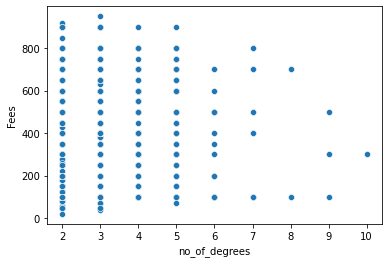

In [48]:
sns.scatterplot(train['no_of_degrees'],train['Fees'])

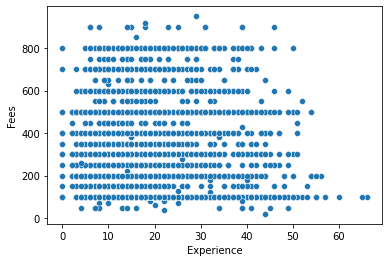

In [49]:
sns.scatterplot(train['Experience'],train['Fees'])

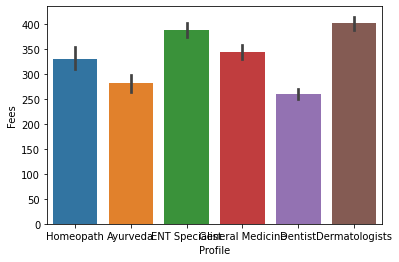

In [50]:
sns.barplot(train['Profile'],train['Fees'])

In [51]:
## dermatologists and ent have most fees

In [52]:
train.head(2)

,Experience,Rating,Profile,Fees,City,no_of_degrees,degree1,degree2
0,24,10,Homeopath,100,Ernakulam,2,BHMS,MS - ENT
1,12,10,Ayurveda,350,Bangalore,2,BAMS,MS - ENT


In [53]:
train['City'].nunique()

9

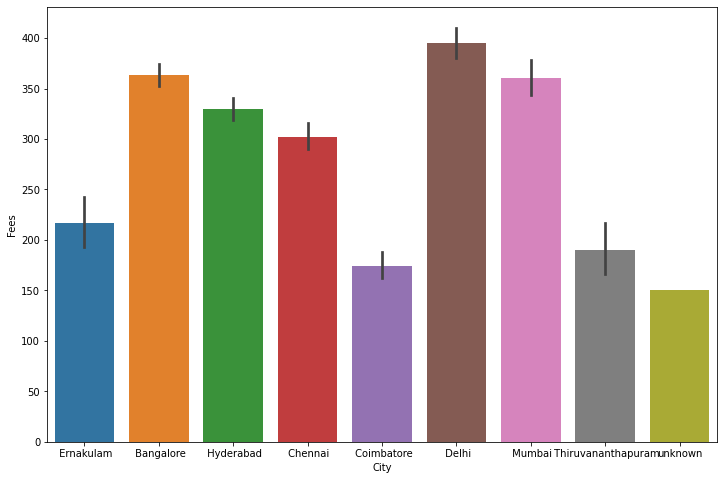

In [54]:
plt.figure(figsize=(12,8))
sns.barplot(train['City'],train['Fees'])

In [55]:
## delhi and bangalore have the highest fees

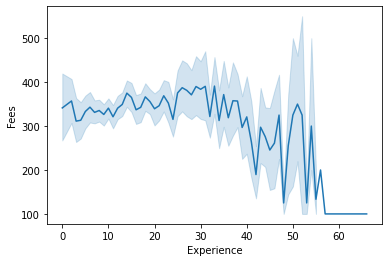

In [56]:
sns.lineplot(train['Experience'],train['Fees'])

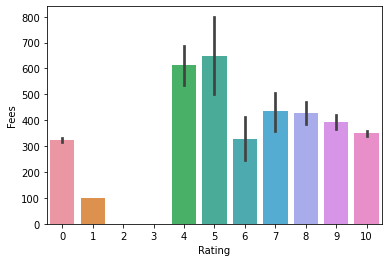

In [57]:
sns.barplot(train['Rating'],train['Fees'])

In [58]:
## so high fees may be the reason of low ratings here

In [59]:
train.head(2)

,Experience,Rating,Profile,Fees,City,no_of_degrees,degree1,degree2
0,24,10,Homeopath,100,Ernakulam,2,BHMS,MS - ENT
1,12,10,Ayurveda,350,Bangalore,2,BAMS,MS - ENT


In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
def encode(df,cols):
  le = LabelEncoder()
  df[cols+'_encoded'] = pd.DataFrame(le.fit_transform(df[cols]))


In [62]:
encode(train,'Profile')

In [63]:
encode(train,'City')

In [64]:
encode(train,'degree1')
encode(train,'degree2')

In [65]:
train.head(2)

,Experience,Rating,Profile,Fees,City,no_of_degrees,degree1,degree2,Profile_encoded,City_encoded,degree1_encoded,degree2_encoded
0,24,10,Homeopath,100,Ernakulam,2,BHMS,MS - ENT,5.0,4.0,6.0,0.0
1,12,10,Ayurveda,350,Bangalore,2,BAMS,MS - ENT,0.0,0.0,4.0,0.0


In [66]:
train.drop(['Profile','City','degree1','degree2'],axis=1,inplace=True)

In [67]:
train.head(2)

,Experience,Rating,Fees,no_of_degrees,Profile_encoded,City_encoded,degree1_encoded,degree2_encoded
0,24,10,100,2,5.0,4.0,6.0,0.0
1,12,10,350,2,0.0,0.0,4.0,0.0


In [68]:
test['City']

0           Mumbai
1        Hyderabad
2          Chennai
3            Delhi
4        Bangalore
           ...    
1982     Bangalore
1983       Chennai
1984       Chennai
1985     Bangalore
1986       Chennai
Name: City, Length: 1987, dtype: object

In [69]:
encode(test,'Profile')
encode(test,'City')
encode(test,'degree1')
encode(test,'degree2')
test.drop(['Profile','City','degree1','degree2'],axis=1,inplace=True)

In [70]:
test.head(2)

,Experience,Rating,no_of_degrees,Profile_encoded,City_encoded,degree1_encoded,degree2_encoded
0,35,0,1,4,6,48,0
1,31,0,2,3,5,48,0


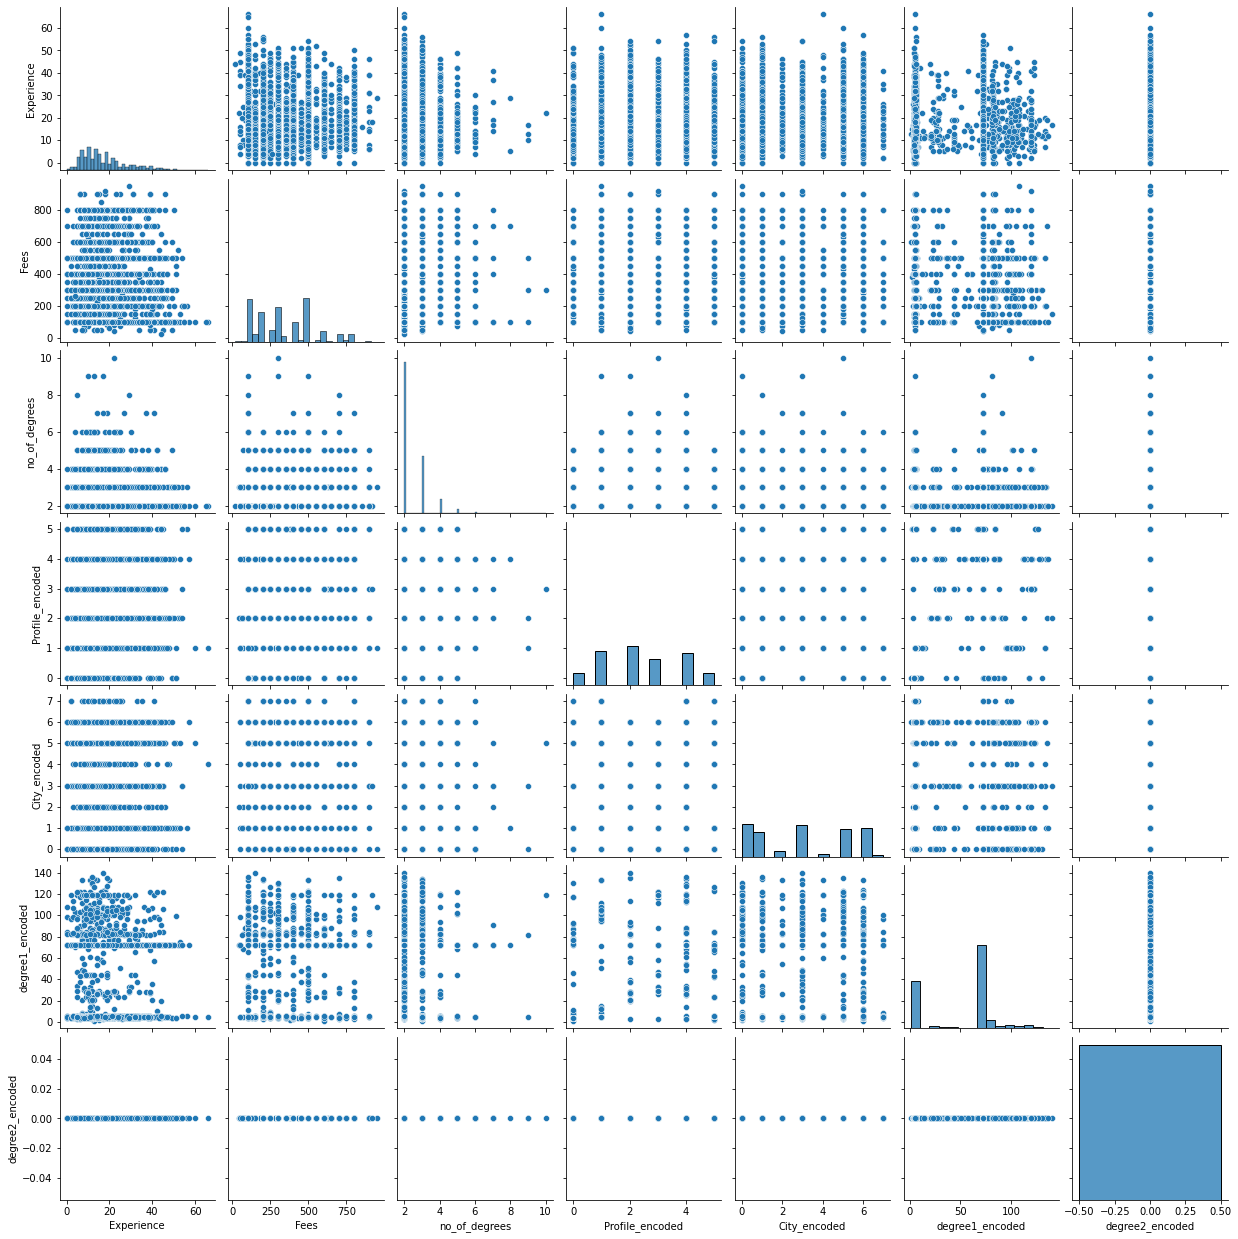

In [71]:
sns.pairplot(train)

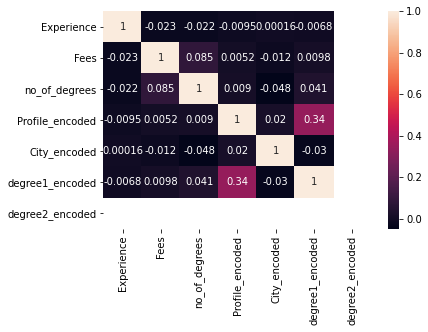

In [72]:
sns.heatmap(train.corr(),annot=True)

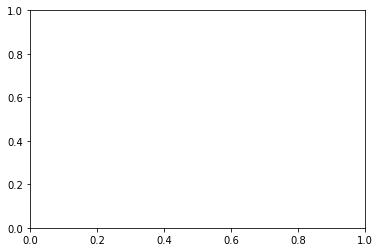

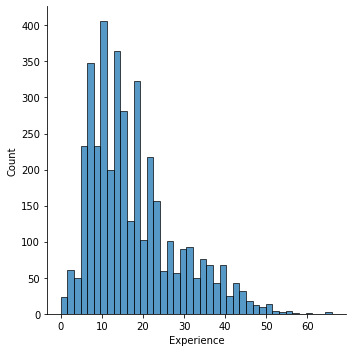

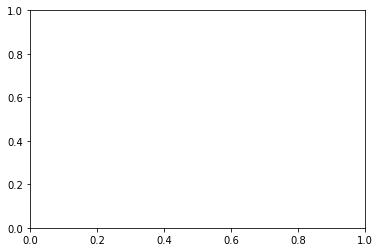

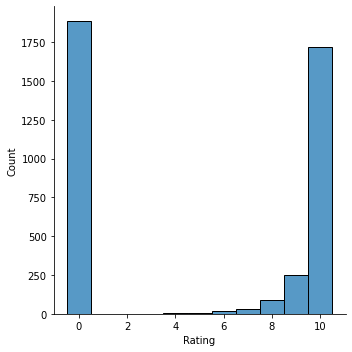

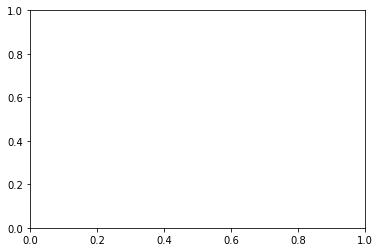

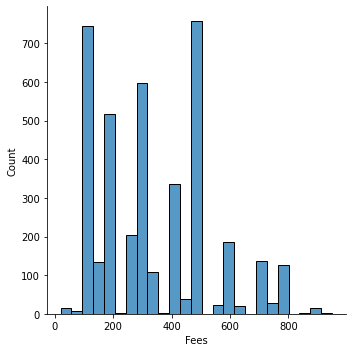

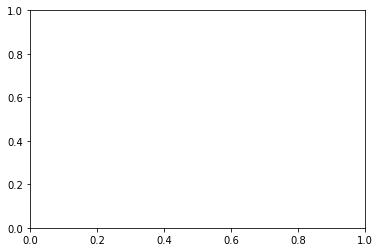

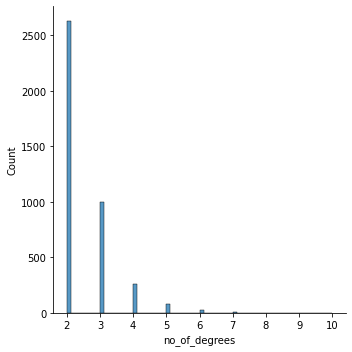

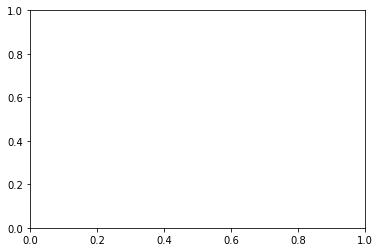

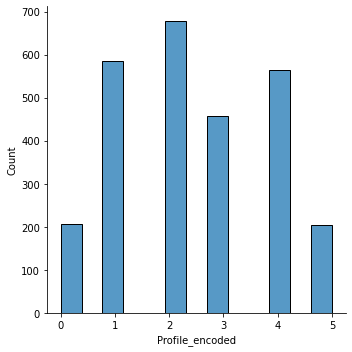

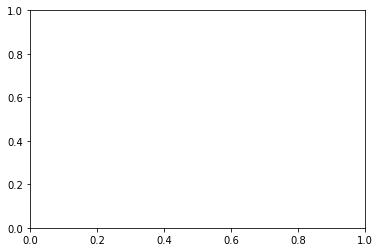

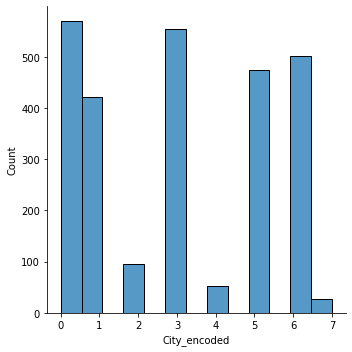

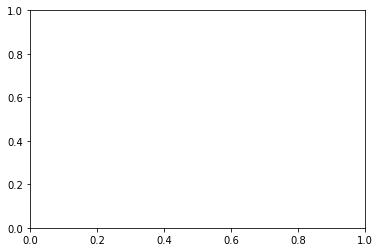

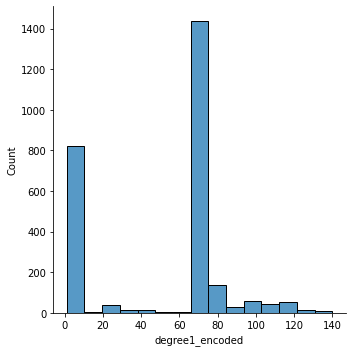

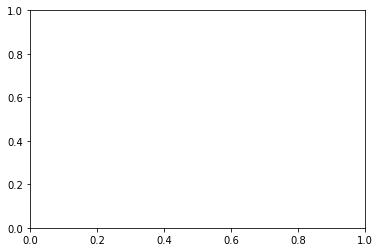

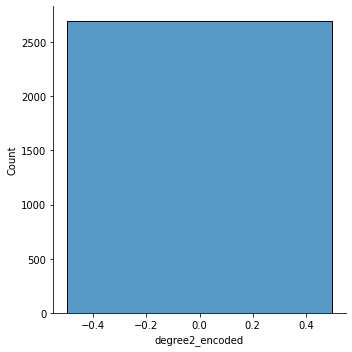

In [73]:
for i in train.columns:
   plt.subplots()
   sns.displot(train[i])

In [74]:
train.skew()

Experience         1.023739
Fees               0.552166
no_of_degrees      2.422874
Profile_encoded    0.099326
City_encoded       0.025864
degree1_encoded   -0.408620
degree2_encoded    0.000000
dtype: float64

In [75]:
train.head(2)

,Experience,Rating,Fees,no_of_degrees,Profile_encoded,City_encoded,degree1_encoded,degree2_encoded
0,24,10,100,2,5.0,4.0,6.0,0.0
1,12,10,350,2,0.0,0.0,4.0,0.0


In [76]:
train['Rating'] = train['Rating'].astype('int')

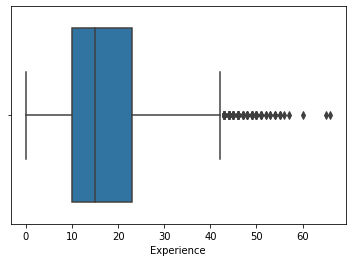

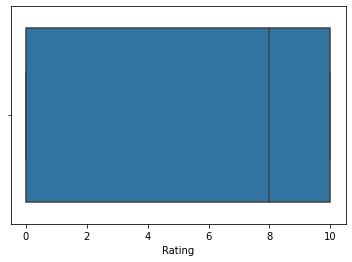

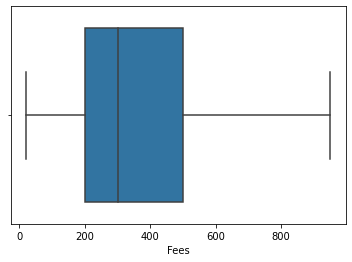

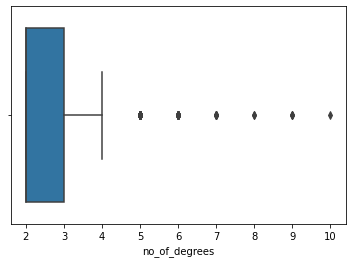

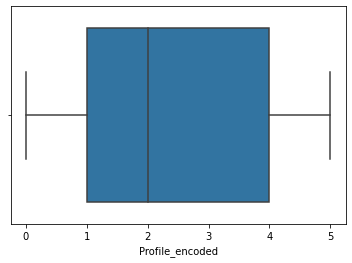

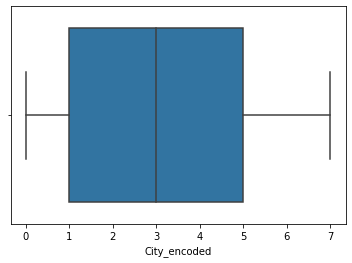

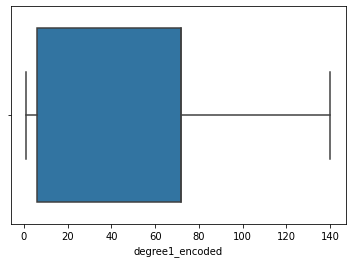

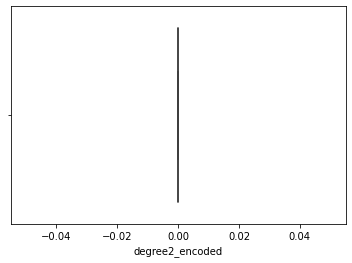

In [77]:
for i in train.columns:
  plt.subplots()
  sns.boxplot(train[i])   

In [78]:
## no significance outliers are present

In [79]:
train.skew()

Experience         1.023739
Rating            -0.081018
Fees               0.552166
no_of_degrees      2.422874
Profile_encoded    0.099326
City_encoded       0.025864
degree1_encoded   -0.408620
degree2_encoded    0.000000
dtype: float64

In [80]:
df = train.copy()

In [81]:
df.dropna(inplace=True)

In [82]:
##train['Experience'] =  np.log1p(train['Experience'])
##train['no_of_degrees'] = np.log1p(train['no_of_degrees'])

In [83]:
#train.skew()

In [84]:
#train['no_of_degrees'] = np.sqrt(train['no_of_degrees'])

In [85]:
#train.skew()

In [86]:
#train['no_of_degrees'] = np.cbrt(train['no_of_degrees'])

In [87]:
#train.skew()

In [88]:
#train

In [89]:
df.drop('degree2_encoded',axis=1,inplace=True)

In [90]:
x = df.drop('Fees',axis=1)
y = df['Fees']

In [91]:
x.shape , y.shape

((2696, 6), (2696,))

In [92]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [93]:
x2 = pd.DataFrame(ss.fit_transform(x), columns=x.columns)

In [94]:
from sklearn.model_selection import train_test_split
x_train ,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [95]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [96]:
from sklearn.metrics import make_scorer

In [97]:
# calculate RMSLE.
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2    # 1-RMSLE

# make our own scorer
scorer = make_scorer(score,greater_is_better=True, needs_proba=False)

In [98]:
knn_reg = KNeighborsRegressor()
svm_reg = SVR(gamma='scale')
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()

In [99]:
# Training and testing
for reg in (knn_reg, svm_reg, dt_reg, rf_reg):
    reg.fit(x_train, y_train)
    
    y_pred = reg.predict(x_test)
    
    print(reg, score(y_pred,y_test))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') 0.7310213126452059
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 0.77324141406391
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') 0.5805689718826392
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease

In [100]:
## as svm is giving the best results .lets tuned it to improve its score

In [101]:
## hyperparameter tuning

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [103]:
params = dict(C=[0.1,1,10], kernel=['linear','poly','rbf'], gamma=['scale','auto'])
rcv = RandomizedSearchCV(svm_reg, param_distributions= params, scoring=scorer, cv=5, random_state=42, n_iter=100, verbose=1, n_jobs=-1)

In [ ]:
rcv.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
  rcv.best_params_

In [105]:
## parameters tuning taking a lot of time

In [104]:
 ## the best model is svm .. saving the model

In [107]:
import joblib
joblib.dump(svm_reg,'fees.pickle')

['fees.pickle']